In [1]:
## The purpose of feature selection : 
# 1) Improve Interpretability 
# 2) Improve Prediction Result 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
pd.options.display.max_columns=999

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (4).csv


The data is from https://www.kaggle.com/c/house-prices-advanced-regression-techniques . It provided detailed housing information and sale price. 
This project is using feature selection method to improve regression prediction power. 

In [3]:
data=pd.read_csv("train.csv")

In [4]:
## Imputation

In [5]:
data.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


### Preprocessing

In [6]:
#check missing values 
(data.isnull().sum()/data.shape[0])[(data.isnull().sum()/data.shape[0])>0.8].index.tolist()

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
#Check Alley, FireplaceQu, PoolQC, Fence and MiscFeature
missings=(data.isnull().sum()/data.shape[0])[(data.isnull().sum()/data.shape[0])>0.8].index.tolist()
for i in missings: 
    print(data[i].value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64
Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64


In [8]:
## There are some variables that missing means the house doesn't have them 
## These variables are

not_miss=["Alley","BsmtQual","BsmtExposure","BsmtCond","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

In [9]:
for i in not_miss:
    data[i]=data[i].replace(np.NaN,"None")

In [10]:
#check missing values 
(data.isnull().sum()/data.shape[0])[(data.isnull().sum()/data.shape[0])>0]

LotFrontage    0.177397
MasVnrType     0.005479
MasVnrArea     0.005479
Electrical     0.000685
GarageYrBlt    0.055479
dtype: float64

In [11]:
#Lot Frountage, let us impute it with 0 
#This is
# because a house with no access to the sidewalk would have no or little
# access to the street. We are then justified with setting the value of NA to 0

data["LotFrontage"]=data["LotFrontage"].replace(np.NaN,0)

In [12]:
#Electrical 
data[data["Electrical"].isnull()]
#only one 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,None,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,167500


In [13]:
#Drop it 
data=data[data["Id"]!=1380]

In [14]:
# GarageYrBlt: Year garage was built
# 
# This correlates with the "No" basements section. There are a number of ways to
# tackle this problem. It will be set to 0, temporarily
data["GarageYrBlt"]=data["GarageYrBlt"].replace(np.NaN,0)

In [15]:
data["Id"].value_counts() # Not useful 
#Let us get rid of it 
data=data.drop('Id',axis=1)

In [16]:
data.isnull().sum()[data.isnull().sum()>0]

MasVnrType    8
MasVnrArea    8
dtype: int64

In [17]:
#Remove these for now 
data=data[data["MasVnrType"].isnull()==False]

In [18]:
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

In [19]:
# OneHotEncoding 

In [20]:
X=data.drop("SalePrice",axis=1)

In [21]:
Y=data["SalePrice"]

In [22]:
X=pd.get_dummies(X,drop_first=True)

In [23]:
X.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,Sal

### Variance Threshold

In [29]:
# Create VarianceThreshold object with a variance with a threshold of 0.5
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]


In [30]:
variance_threshold_selector(X,0.5).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [31]:
variance_threshold_selector(X,0.5).shape[1]

30

In [32]:
variance_threshold_selector(X,0.3).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [33]:
variance_threshold_selector(X,0.3).shape[1]

32

In [34]:
variance_threshold_selector(X,0.1).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_Reg', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'Condition1_Norm', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard',
       'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'ExterQual_Gd', 'ExterQu

In [35]:
variance_threshold_selector(X,0.1).shape[1]

79

Changing Threshold has an impact on feature selection. When threshold is 0.3 or 0.5, the difference of resulted feature wasn't obvious. Threshold as 0.1  siginifcantly increases the number of features included. Threshold 0.1 is chosen in this project, to retain the most of information from the orginal dataset.  

In [36]:
#Let us use 0.1 to keep the most information.
cols=variance_threshold_selector(X,0.1).columns

In [37]:
X_orig=X

In [38]:
X_after=X[cols]

### Linear Regression 

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


In [0]:
#orginial dataset 

X_train,X_test,y_train,y_test=train_test_split(X_orig,Y,test_size=0.3,random_state=3)

In [0]:
lr = LinearRegression()
lr.fit(X_train, y_train)
#R-square of the linear regression on training dataset
orig_lr_rs=lr.score(X_train,y_train)

#R-square of the linear regression on test dataset
orig_lr_trs=lr.score(X_test,y_test)
from sklearn.metrics import mean_squared_log_error
#Prediction result 
orig_lr_msle=mean_squared_log_error(y_test, lr.predict(X_test))  

In [0]:
# the dataset after variance threshold selection 

X_train,X_test,y_train,y_test=train_test_split(X_after,Y,test_size=0.3,random_state=3)

In [0]:
lr = LinearRegression()
lr.fit(X_train, y_train)
#R-square of the linear regression on training dataset
var_lr_rs=lr.score(X_train,y_train)

#R-square of the linear regression on test dataset
var_lr_trs=lr.score(X_test,y_test)
from sklearn.metrics import mean_squared_log_error
#Prediction result 
var_lr_msle=mean_squared_log_error(y_test, lr.predict(X_test))  

### Interacting Term

In [0]:
#Add one interacting term and check its effect on model improvement. 
X_int=X_orig.copy()
X_int["Quality*Condition"]=X_int["OverallQual"]*X_int["OverallCond"]

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X_int,Y,test_size=0.3,random_state=3)

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#R-square of the linear regression on training dataset with interacting term 
int_lr_rs=lr.score(X_train,y_train)
#R-square of the linear regression on test dataset with interacting term 
int_lr_trs=lr.score(X_test,y_test)

#Prediction result 
int_lr_msle=mean_squared_log_error(y_test, lr.predict(X_test))  

In [44]:
[orig_lr_rs,int_lr_rs]  

[0.9530193196999682, 0.9531932507787634]

In [45]:
[orig_lr_trs,int_lr_trs]  #increase test R square with the interacting term 

[0.7811746426189593, 0.7830556047170047]

In [46]:
[orig_lr_msle,int_lr_msle] 

[0.02844966760572892, 0.027567238095728558]

original dataset has a higher mean square log error. The interacting term helped with prediction result. 

### Pearson Correlation

In [0]:
#Keep using the orginal dataset, the one after variance threshold selection. 
df=X_orig.copy()

In [0]:
df=pd.concat([df,Y],axis=1)

In [49]:
df.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,Sal

In [50]:
df.corr()["SalePrice"].sort_values(ascending=False)

SalePrice                1.000000
OverallQual              0.790085
GrLivArea                0.710073
GarageCars               0.639749
GarageArea               0.622484
TotalBsmtSF              0.613299
1stFlrSF                 0.606969
FullBath                 0.562710
TotRmsAbvGrd             0.536366
YearBuilt                0.523274
YearRemodAdd             0.507488
Foundation_PConc         0.497827
MasVnrArea               0.477486
Fireplaces               0.468973
ExterQual_Gd             0.456644
BsmtFinType1_GLQ         0.433466
Neighborhood_NridgHt     0.396427
BsmtFinSF1               0.383995
SaleType_New             0.354884
SaleCondition_Partial    0.349362
FireplaceQu_Gd           0.337382
GarageType_Attchd        0.335749
MasVnrType_Stone         0.333309
Neighborhood_NoRidge     0.332661
KitchenQual_Gd           0.325277
WoodDeckSF               0.324658
2ndFlrSF                 0.322840
OpenPorchSF              0.311244
Exterior2nd_VinylSd      0.304877
Exterior1st_Vi

In [0]:
imt_features=[]
imt_features.extend(df.corr()["SalePrice"].sort_values(ascending=False).index.tolist()[:30])
imt_features.extend(df.corr()["SalePrice"].sort_values(ascending=True).index.tolist()[:30])

In [0]:
df=df[imt_features]

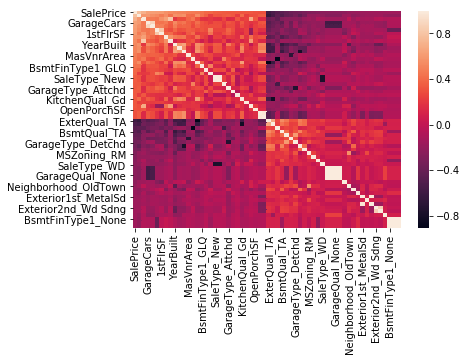

In [53]:
sns.heatmap(df.corr())

In [0]:
#Try only use these term to predict sale price using linear regression 

In [0]:
imt_features.remove("SalePrice")

In [0]:
X=df[imt_features]

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [58]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#R-square of the linear regression on training dataset seleted by pearson correlation  
pc_lr_rs=lr.score(X_train,y_train)

#R-square of the linear regression on test dataset seleted by pearson correlation
pc_lr_trs=lr.score(X_test,y_test)


#Prediction result 
pc_lr_msle=mean_squared_log_error(y_test, lr.predict(X_test))  

In [60]:
#Compare with orginial dataset 
[orig_lr_rs,pc_lr_rs]  #Rsquare on training set   

[0.9530193196999682, 0.856547413263497]

In [61]:
#Compare with orginial dataset 
[orig_lr_trs,pc_lr_trs]  #Rsquare on test set    #improved by using the person correlation 

[0.7811746426189593, 0.7835001222651512]

In [62]:
#Compare with orginial dataset 
[orig_lr_msle,pc_lr_msle]  #Prediction result on test set   
#The orginial dataset works better than person corrleation one 

[0.02844966760572892, 0.031962348642854715]

### ANOVA Feature Selection : Univariate Test

In [0]:
from sklearn import feature_selection
from sklearn.feature_selection import f_regression


def ANOVA(X,y):
    '''Univariate linear regression tests
    Quick linear model for sequentially testing the effect of many regressors
    Using scikit learn's Feature selection toolbox
    Returns:
        F (array) = F-values for regressors
        pvalues (array) = p-values for F-scores'''

    (F,pvalues) = f_regression(X,y)
    return (F,pvalues) 

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X_orig,Y,test_size=0.3,random_state=3)

In [65]:
Fs,pvals=ANOVA(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [66]:
pvals<=0.01

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


array([False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False, False,
        True, False,  True,  True, False,  True, False,  True, False,
        True,  True, False, False, False,  True, False, False,  True,
       False, False, False,  True,  True, False, False, False,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True, False, False, False,  True,  True, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
       False, False,

In [67]:
from itertools import compress
features=list(compress(X_train.columns.tolist(), pvals<=0.01))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  


In [68]:
#fit the linear regression used the feature selected with ANOVA 
lr = LinearRegression()
lr.fit(X_train[features], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#R-square of the linear regression on training dataset seleted by ANOVA
anova_lr_rs=lr.score(X_train[features],y_train)

#R-square of the linear regression on test dataset seleted by ANOVA
anova_lr_trs=lr.score(X_test[features],y_test)


#Prediction result 
anova_lr_msle=mean_squared_log_error(y_test, lr.predict(X_test[features]))  

In [70]:
#Compare with orginial dataset 
[orig_lr_rs,anova_lr_rs]  #Rsquare on training set   

[0.9530193196999682, 0.907615496246673]

In [71]:
#Compare with orginial dataset 
[orig_lr_trs,anova_lr_trs]  #Rsquare on training set   #improved by using ANOVA 

[0.7811746426189593, 0.8055282214024393]

In [72]:
#Compare with orginial dataset 
[orig_lr_msle,anova_lr_msle]  #Rsquare on result prediction  

[0.02844966760572892, 0.028983400795026152]

The original data set (after variance threshold feature selection) works better than the feature selection done by ANOVA

### Compare the result in one bar charts 

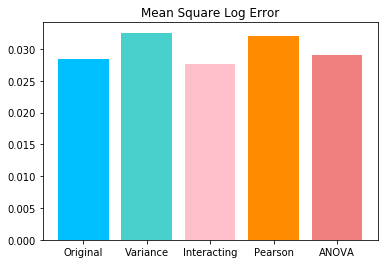

In [73]:
 
  
# Make fake dataset
height = [orig_lr_msle,var_lr_msle, int_lr_msle, pc_lr_msle, anova_lr_msle]
bars = ('Original', 'Variance','Interacting', 'Pearson', 'ANOVA')
 
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
y_pos = [0,1,2,3,4]
 
# Create bars
plt.bar(y_pos, height,color=['deepskyblue','mediumturquoise', 'pink', 'darkorange', 'lightcoral', 'salmon'])
 
# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.title("Mean Square Log Error")
 
# Show graphic
plt.show()



Smaller value is prefered. 

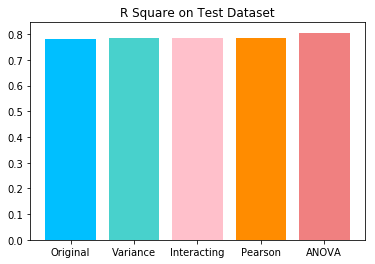

In [74]:

height = [orig_lr_trs,var_lr_trs, int_lr_trs, pc_lr_trs, anova_lr_trs]
bars = ('Original','Variance', 'Interacting', 'Pearson', 'ANOVA')
 
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
y_pos = [0,1,2,3,4]
 
# Create bars
plt.bar(y_pos, height,color=['deepskyblue','mediumturquoise', 'pink', 'darkorange', 'lightcoral', 'salmon'])
 
# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.title("R Square on Test Dataset")
 
# Show graphic
plt.show()



Larger value is perferred. 

### Ridge Regression

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X_orig,Y,test_size=0.3,random_state=3)

In [76]:
#fit the linear regression used all features
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [78]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [79]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

#Score is R square 
#Too much alpha didn't help 
# the low alpha improved the test R^2 

linear regression train score: 0.9530193196999682
linear regression test score: 0.7811746426189593
ridge regression train score low alpha: 0.9518680427241971
ridge regression test score low alpha: 0.7894529970403259
ridge regression train score high alpha: 0.8738603539797813
ridge regression test score high alpha: 0.8123391657490237


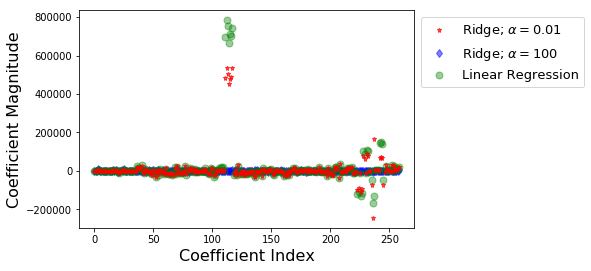

In [80]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc="upper left", bbox_to_anchor=(1,1))
plt.show()

The graphs shows the changed on coefficient magnitude by controlling the alpha/lambda value of ridge regression. When alpha is large, the ridge regression gives a larger penalty on coefficients, we can see that, most coefficients ended up near 0 when alpha =100. 

In [0]:
## See how the maginitude of coeffienicients changed when change alpha value 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11998e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.30847e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50468e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75533e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.07022e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarni

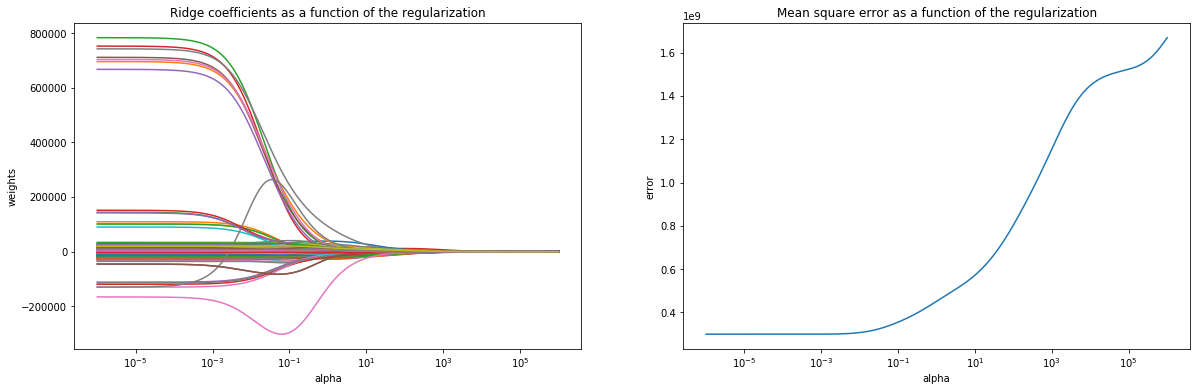

In [82]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge()


coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(y_train,clf.predict(X_train)))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Mean square error as a function of the regularization')
plt.axis('tight')

plt.show()

The result shows that a alpha value larger than 10^3, will restult in all weights closed to 0 and when alpah value close to 10^-1, the mean square error increased.  A alpha value near 10^-2 might be the idea choice for alpha/lambda/k.

In [83]:
#run a ridge model using alpha value = 10^-2 
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
#R-square of the ridge regression on training dataset 
rr_rs=rr.score(X_train,y_train)

#R-square of the ridge regression on training dataset 
rr_trs=rr.score(X_test,y_test)


#Prediction result 
rr_msle=mean_squared_log_error(y_test, rr.predict(X_test))  

### Lasso Regression  - Use the orginial dataset

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X_orig,Y,test_size=0.3,random_state=3)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
lr.score(X_train,y_train)

0.9530193196999682

In [87]:
lr.score(X_test,y_test)

0.7811746426189593

In [0]:
from sklearn.linear_model import Lasso

In [89]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)
#Lasso have a slightly better imporvemnt than ridge regression


training score: 0.9528113780728583
test score:  0.785214128214621
number of features used:  239


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159546094320.86835, tolerance: 647008613.975175
  positive)


In [90]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso2 = Lasso(alpha=2, max_iter=10e5)
lasso2.fit(X_train,y_train)
train_score2=lasso2.score(X_train,y_train)
test_score2=lasso2.score(X_test,y_test)
coeff_used2 = np.sum(lasso2.coef_!=0)
print ("training score for alpha=2:", train_score2) 
print ("test score for alpha =2: ", test_score2)
print ("number of features used: for alpha =2:", coeff_used2)
#alpha value 2 slightly over perform te alpha value 0.01


lasso10 = Lasso(alpha=10, max_iter=10e5)
lasso10.fit(X_train,y_train)
train_score10=lasso10.score(X_train,y_train)
test_score10=lasso10.score(X_test,y_test)
coeff_used10 = np.sum(lasso10.coef_!=0)
print ("training score for alpha=10:", train_score10) 
print ("test score for alpha =10: ", test_score10)
print ("number of features used: for alpha =10:", coeff_used10)
#alpha value 10 slightly over perform te alpha value 2

training score for alpha=0.01: 0.9530193013752705
test score for alpha =0.01:  0.7856270371181654
number of features used: for alpha =0.01: 247
training score for alpha=2: 0.9525700204450875
test score for alpha =2:  0.7861051465714156
number of features used: for alpha =2: 231
training score for alpha=10: 0.9482811153981022
test score for alpha =10:  0.8087854360715887
number of features used: for alpha =10: 207


In [91]:
lasso100 = Lasso(alpha=100, max_iter=10e5)
lasso100.fit(X_train,y_train)
train_score100=lasso100.score(X_train,y_train)
test_score100=lasso100.score(X_test,y_test)
coeff_used100 = np.sum(lasso100.coef_!=0)
print ("training score for alpha=100:", train_score100) 
print ("test score for alpha =100: ", test_score100)
print ("number of features used: for alpha =100:", coeff_used100)
#alpha value 100 slightly over perform te alpha value 10

training score for alpha=100: 0.9161237787810805
test score for alpha =100:  0.8159754280065404
number of features used: for alpha =100: 114


A larger alpha value of lasso regression result in better perforaance on test dataset.

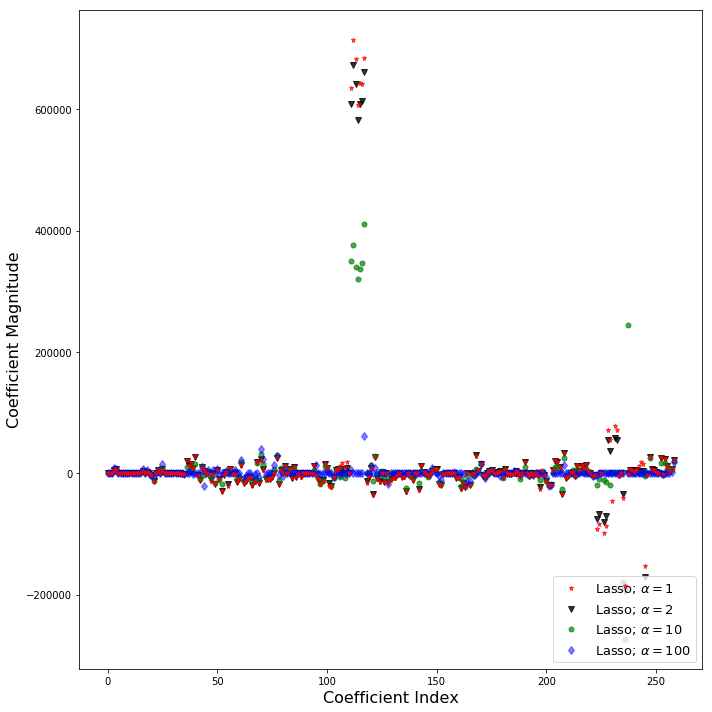

In [92]:
fig = plt.figure(figsize=(10, 10))
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso2.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 2$') # alpha here is for transparency
plt.plot(lasso10.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label=r'Lasso; $\alpha = 10$',zorder=2)
plt.plot(lasso100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 100$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

As the alpha value increase, most of the coefficient got set as 0. 

In [0]:
#Best lasso model 
lasso100 = Lasso(alpha=100, max_iter=10e5)
lasso100.fit(X_train,y_train)

#R-square of the lasso regression on training dataset 
ls_rs=lasso100.score(X_train,y_train)

#R-square of the lasso regression on training dataset 
ls_trs=lasso100.score(X_test,y_test)


#Prediction result 
ls_msle=mean_squared_log_error(y_test, lasso100.predict(X_test))  

### Tree Model

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X_orig,Y,test_size=0.3,random_state=3)



# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [0]:
feature=X_orig.columns.tolist()
feature_list=feature

In [0]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [0]:
files.download( "tree.png" )  

In [98]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: OverallQual          Importance: 0.56
Variable: GrLivArea            Importance: 0.13
Variable: 2ndFlrSF             Importance: 0.04
Variable: TotalBsmtSF          Importance: 0.03
Variable: GarageCars           Importance: 0.03
Variable: BsmtFinSF1           Importance: 0.02
Variable: 1stFlrSF             Importance: 0.02
Variable: GarageArea           Importance: 0.02
Variable: LotArea              Importance: 0.01
Variable: YearBuilt            Importance: 0.01
Variable: YearRemodAdd         Importance: 0.01
Variable: MasVnrArea           Importance: 0.01
Variable: FullBath             Importance: 0.01
Variable: TotRmsAbvGrd         Importance: 0.01
Variable: GarageYrBlt          Importance: 0.01
Variable: MSSubClass           Importance: 0.0
Variable: LotFrontage          Importance: 0.0
Variable: OverallCond          Importance: 0.0
Variable: BsmtFinSF2           Importance: 0.0
Variable: BsmtUnfSF            Importance: 0.0
Variable: LowQualFinSF         Importance: 0.

In [99]:
#select the variables with importance value greater than 0
[t for t in feature_importances if t[1]>0]

[('OverallQual', 0.56),
 ('GrLivArea', 0.13),
 ('2ndFlrSF', 0.04),
 ('TotalBsmtSF', 0.03),
 ('GarageCars', 0.03),
 ('BsmtFinSF1', 0.02),
 ('1stFlrSF', 0.02),
 ('GarageArea', 0.02),
 ('LotArea', 0.01),
 ('YearBuilt', 0.01),
 ('YearRemodAdd', 0.01),
 ('MasVnrArea', 0.01),
 ('FullBath', 0.01),
 ('TotRmsAbvGrd', 0.01),
 ('GarageYrBlt', 0.01)]

In [0]:
features=[t[0] for t in feature_importances if t[1]>0]

In [0]:
#Use only the features than with importance higher than 0.0 and run linear regression

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X_orig[features],Y,test_size=0.3,random_state=3)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#R-square of the linear regression on training dataset seleted by random forest
tree_lr_rs=lr.score(X_train,y_train)

#R-square of the linear regression on test dataset seleted by random forest
tree_lr_trs=lr.score(X_test,y_test)


#Prediction result 
tree_lr_msle=mean_squared_log_error(y_test, lr.predict(X_test))  

### Compare result of ridge, lasso and tree

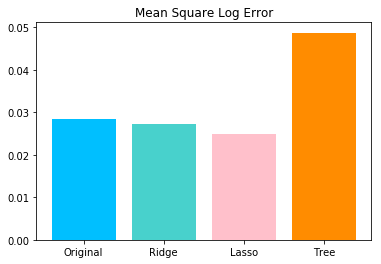

In [104]:
 
  
# Make fake dataset
height = [orig_lr_msle,rr_msle, ls_msle, tree_lr_msle]
bars = ('Original', 'Ridge','Lasso','Tree')
 
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
y_pos = [0,1,2,3]
 
# Create bars
plt.bar(y_pos, height,color=['deepskyblue','mediumturquoise', 'pink', 'darkorange'])
 
# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.title("Mean Square Log Error")
 
# Show graphic
plt.show()



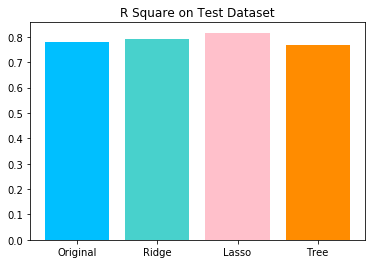

In [106]:

height = [orig_lr_trs,rr_trs, ls_trs, tree_lr_trs]
bars = ('Original','Ridge', 'Lasso', 'Tree')
 
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
y_pos = [0,1,2,3]
 
# Create bars
plt.bar(y_pos, height,color=['deepskyblue','mediumturquoise', 'pink', 'darkorange'])
 
# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.title("R Square on Test Dataset")
 
# Show graphic
plt.show()



Lasso regression with alpha value =100 has the best performance.  

### Stepwise Selection

In [24]:
import pandas as pd
import numpy  as np
import psycopg2 as ps
import matplotlib.pyplot as plt

import scipy.stats as scp_stats

import statsmodels.api as sm

In [39]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_orig,Y,test_size=0.3,random_state=3)


In [40]:

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    aics=[]
    bics=[]
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        aics.append(model.aic)
        bics.append(model.bic)
    return included,aics,bics

features,aics,bics = stepwise_selection(X_train, y_train)

print('resulting features:')
print(features)


C:\Users\nicol\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\nicol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\nicol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\nicol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  OverallQual                    with p-value 7.90915e-218
Add  GrLivArea                      with p-value 1.34453e-72
Add  GarageCars                     with p-value 3.02103e-24
Add  BsmtFinSF1                     with p-value 7.32571e-20
Add  Neighborhood_NridgHt           with p-value 2.98653e-12
Add  Neighborhood_NoRidge           with p-value 3.04027e-14
Add  MSSubClass                     with p-value 5.7848e-12
Add  BsmtExposure_No                with p-value 1.45413e-11
Add  Exterior1st_CemntBd            with p-value 3.62205e-10
Add  PoolQC_Gd                      with p-value 2.95518e-09
Add  PoolArea                       with p-value 1.19879e-10
Add  PoolQC_None                    with p-value 1.17519e-23
Add  SaleType_New                   with p-value 1.63961e-15
Add  RoofMatl_WdShngl               with p-value 3.59291e-09
Add  YearRemodAdd                   with p-value 2.46867e-10
Add  MasVnrArea                     with p-value 5.38579e-08
Add  Neighborhood_StoneB

In [41]:
len(features)

48

In [42]:
x=np.arange(1,len(aics)+1)

Text(0.5,1,'Stepwise Selection')

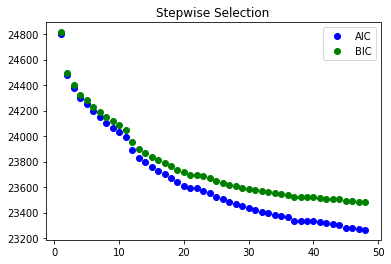

In [43]:

plt.plot(x, aics, 'bo')
plt.plot(x, bics, 'go')
plt.legend(["AIC","BIC"])
plt.title("Stepwise Selection")

In [46]:
import sklearn.linear_model as linear_model

from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train[features], y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test[features])

stepwise_mse=mean_squared_error(y_test, y_pred)
stepwise_r2=r2_score(y_test, y_pred)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 8.65051409e+03  6.38666687e+01  6.79824973e+03  9.74427016e+00
  2.67380091e+04  4.17615331e+04 -2.38871817e+02 -7.50733059e+03
  1.61783179e+04 -4.43060992e+05  2.18605172e+03  9.75051567e+05
  1.85327621e+04  9.93634312e+04  1.29137301e+02  3.88575149e+01
  4.34874588e+04  1.89891870e+04  1.57859203e+04  2.36587934e+04
 -7.88015505e+04 -7.88015505e+04  2.71642824e-01  3.84790276e+02
  6.34212925e+03  2.11419138e+04  2.13658971e+04 -2.78472049e+04
 -4.04429530e+03  1.97767536e+04  1.07554726e+04  1.39931936e+04
  1.73663466e+04  6.81079090e+03  2.97572032e+04 -2.54987676e+04
 -9.72185039e+03 -9.72185039e+03 -9.72185038e+03 -9.72185038e+03
 -2.12065576e+04 -3.49797491e+04  7.71789552e+03 -2.61694666e+04
 -2.07065857e+04  4.01391043e+03  5.97157993e+03  6.44139998e+04]
Mean squared error: 1443633886.26
Variance score: 0.76


### Forward Selection 

In [47]:
import statsmodels.api as sm

def forward_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    aics=[]
    bics=[]
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        if not changed:
            break
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        aics.append(model.aic)
        bics.append(model.bic)
    return included,aics,bics

features,aics,bics = forward_selection(X_train, y_train)

print('resulting features:')
print(features)


C:\Users\nicol\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\nicol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\nicol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\nicol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  OverallQual                    with p-value 7.90915e-218
Add  GrLivArea                      with p-value 1.34453e-72
Add  GarageCars                     with p-value 3.02103e-24
Add  BsmtFinSF1                     with p-value 7.32571e-20
Add  Neighborhood_NridgHt           with p-value 2.98653e-12
Add  Neighborhood_NoRidge           with p-value 3.04027e-14
Add  MSSubClass                     with p-value 5.7848e-12
Add  BsmtExposure_No                with p-value 1.45413e-11
Add  Exterior1st_CemntBd            with p-value 3.62205e-10
Add  PoolQC_Gd                      with p-value 2.95518e-09
Add  PoolArea                       with p-value 1.19879e-10
Add  PoolQC_None                    with p-value 1.17519e-23
Add  SaleType_New                   with p-value 1.63961e-15
Add  RoofMatl_WdShngl               with p-value 3.59291e-09
Add  YearRemodAdd                   with p-value 2.46867e-10
Add  MasVnrArea                     with p-value 5.38579e-08
Add  Neighborhood_StoneB

In [50]:
len(features)

48

Text(0.5,1,'Forward Selection')

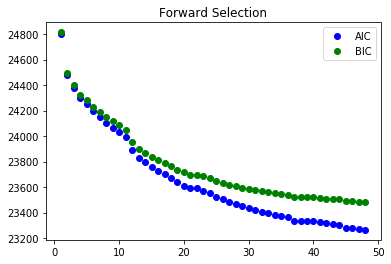

In [48]:
plt.plot(x, aics, 'bo')
plt.plot(x, bics, 'go')
plt.legend(["AIC","BIC"])
plt.title("Forward Selection")

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train[features], y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test[features])


forward_mse=mean_squared_error(y_test, y_pred)
forward_r2=r2_score(y_test, y_pred)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 8.65051409e+03  6.38666687e+01  6.79824973e+03  9.74427016e+00
  2.67380091e+04  4.17615331e+04 -2.38871817e+02 -7.50733059e+03
  1.61783179e+04 -4.43060992e+05  2.18605172e+03  9.75051567e+05
  1.85327621e+04  9.93634312e+04  1.29137301e+02  3.88575149e+01
  4.34874588e+04  1.89891870e+04  1.57859203e+04  2.36587934e+04
 -7.88015505e+04 -7.88015505e+04  2.71642824e-01  3.84790276e+02
  6.34212925e+03  2.11419138e+04  2.13658971e+04 -2.78472049e+04
 -4.04429530e+03  1.97767536e+04  1.07554726e+04  1.39931936e+04
  1.73663466e+04  6.81079090e+03  2.97572032e+04 -2.54987676e+04
 -9.72185039e+03 -9.72185039e+03 -9.72185038e+03 -9.72185038e+03
 -2.12065576e+04 -3.49797491e+04  7.71789552e+03 -2.61694666e+04
 -2.07065857e+04  4.01391043e+03  5.97157993e+03  6.44139998e+04]
Mean squared error: 1443633886.26
Variance score: 0.76


### Backward Selection 

In [52]:
import statsmodels.api as sm

def back_selection(X, y, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    aics=[]
    bics=[]
    included = X.columns.tolist()
    while True:
        changed=False
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        aics.append(model.aic)
        bics.append(model.bic)
    return included,aics,bics

features,aics,bics = back_selection(X_train, y_train)

print('resulting features:')
print(features)


C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Drop Exterior2nd_Wd Sdng            with p-value 0.995328
Drop ExterCond_TA                   with p-value 0.992476
Drop BsmtFinType2_LwQ               with p-value 0.99111
Drop Condition2_Norm                with p-value 0.991225
Drop Condition1_RRNn                with p-value 0.983057
Drop Exterior2nd_Brk Cmn            with p-value 0.979869
Drop Heating_GasW                   with p-value 0.972932
Drop SaleType_New                   with p-value 0.958343
Drop Exterior1st_MetalSd            with p-value 0.949921
Drop BsmtCond_None                  with p-value 0.939768
Drop BsmtFinType1_None              with p-value 0.939768
Drop BsmtExposure_None              with p-value 0.939768
Drop BsmtQual_None                  with p-value 0.939768
Drop Condition1_PosA                with p-value 0.938827
Drop HeatingQC_Fa                   with p-value 0.923342
Drop BsmtFinType1_LwQ               with p-value 0.914709
Drop Foundation_CBlock              with p-value 0.909262
Drop FireplaceQ

Drop 3SsnPorch                      with p-value 0.131276
Drop BsmtFinType1_Unf               with p-value 0.158439
Drop Exterior1st_CemntBd            with p-value 0.133571
Drop Neighborhood_NPkVill           with p-value 0.114422
Drop Exterior2nd_Stucco             with p-value 0.103269
Drop Heating_GasA                   with p-value 0.154574
Drop Heating_Wall                   with p-value 0.145048
Drop Foundation_Slab                with p-value 0.184741
Drop Exterior1st_AsphShn            with p-value 0.169201
Drop Exterior1st_Stucco             with p-value 0.128425
Drop BsmtFullBath                   with p-value 0.114955
Drop MSZoning_FV                    with p-value 0.106482
Drop BsmtExposure_Mn                with p-value 0.111444
Drop GarageFinish_RFn               with p-value 0.0977489
Drop LandSlope_Sev                  with p-value 0.0958069
Drop Exterior1st_WdShing            with p-value 0.0930737
Drop Exterior2nd_Stone              with p-value 0.106289
Drop Electr

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train[features], y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test[features])


backward_mse=mean_squared_error(y_test, y_pred)
backward_r2=r2_score(y_test, y_pred)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 6.44131349e-01  6.45216824e+03  6.84235704e+03  5.28377980e+02
  3.71604217e+01  1.55293240e+01  2.30815263e+01  2.14831505e+01
  5.74041516e+01 -4.21693898e+03 -2.20459211e+04  8.21048924e+03
  2.31542901e+01  1.40541108e+01  5.59242109e+03  3.83093941e+04
  9.47876775e+03 -1.14524662e+04  6.79995272e+03 -1.60634240e+04
 -1.33989224e+04  1.69536447e+04 -1.35512315e+04 -1.46595235e+04
 -2.08802592e+04 -1.26918624e+04 -1.75372442e+04  1.53140284e+04
 -8.83602489e+03 -8.16663176e+03 -1.11000306e+04  2.04770485e+04
 -2.11721256e+04  9.73145659e+03 -2.42746929e+04 -1.86689060e+04
  1.74487802e+04  9.40262394e+03 -3.87622147e+04 -2.27561879e+04
 -6.36356883e+03  7.14735971e+05  7.82628097e+05  7.39456084e+05
  6.93685226e+05  7.14384455e+05  7.19920049e+05  7.63076159e+05
 -7.05464568e+03 -1.33516666e+04 -5.63966838e+03 -6.55695663e+03
 -7.39722106e+03  7.65358469e+03  7.01514255e+03 -1.88856593e+04
 -2.24610310e+04 -2.96096622e+04 -1.95003776e+04 -1.63089499e+04
  1.71241

In [55]:
len(features)

86

In [56]:
x=np.arange(1,len(aics)+1)

Text(0.5,1,'Backward Selection')

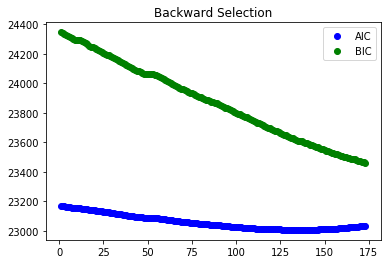

In [57]:
plt.plot(x, aics, 'bo')
plt.plot(x, bics, 'go')
plt.legend(["AIC","BIC"])
plt.title("Backward Selection")

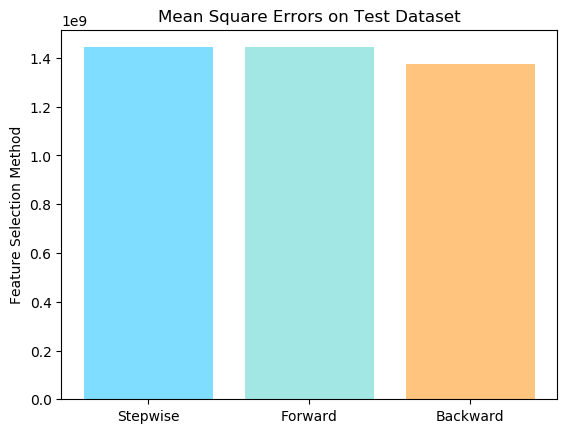

In [59]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('Stepwise', 'Forward', 'Backward')
y_pos = np.arange(len(objects))
performance = [stepwise_mse,forward_mse,backward_mse]

plt.bar(y_pos, performance, align='center', alpha=0.5,color=['deepskyblue','mediumturquoise', 'darkorange'])
plt.xticks(y_pos, objects)
plt.ylabel('Feature Selection Method')
plt.title('Mean Square Errors on Test Dataset')

plt.show()